In [1]:
%run CommonCodeForExperiments.ipynb

In [2]:
aitia = App()

In [3]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.FCI)
algorithm_list.append(aitia.algo_runner.FGES_continuous)
algorithm_list.append(aitia.algo_runner.GFCI_continuous)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [4]:
def run_causal_discovery(df, target_graph_str, algorithm_list, pc):
    analysis_results, summary = aitia.run_analysis(df, 
                                               target_graph_str=target_graph_str, 
                                               algorithm_list=algorithm_list,
                                               pc=pc)  
    return analysis_results, summary 

In [14]:
def get_clustered_dataframe(incoming_df, column_list, sample_size):
    gmm = mixture.BayesianGaussianMixture(n_components=2, 
                                          covariance_type="full", 
                                          n_init=100, 
                                          random_state=42).fit(incoming_df)
    clustered_data = gmm.sample(sample_size)
    clustered_df = pd.DataFrame(clustered_data[0], columns=column_list)
    return clustered_df

In [7]:
pc = pycausal()
pc.start_vm()

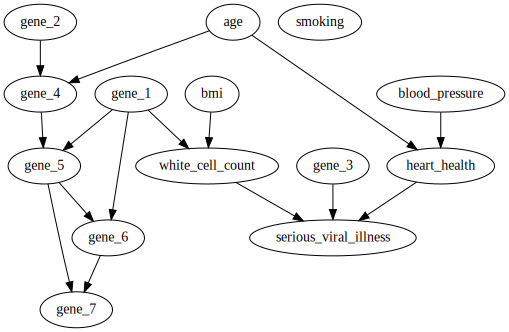

In [8]:
virus_scm = aitia.data.virus_scm()
virus_scm.cgm.draw()

In [9]:
target_graph_str = str(virus_scm.cgm.draw())

In [10]:
df = virus_scm.sample(2000)

In [11]:
analysis_results, summary = run_causal_discovery(df, target_graph_str, algorithm_list, pc)
summary

,Algorithm,AUPR,SHD
0,PC,0.935884,2
1,FCI,0.935884,2
2,FGES-continuous,0.935884,2
3,GFCI-continuous,0.935884,2
4,RFCI-continuous,0.935884,2


In [12]:
df_confd = df.drop(['white_cell_count', 'heart_health'], axis=1)

In [13]:
analysis_results_confd, summary_confd = run_causal_discovery(df_confd, target_graph_str, algorithm_list, pc)
summary_confd

,Algorithm,AUPR,SHD
0,PC,0.690306,9
1,FCI,0.690306,9
2,FGES-continuous,0.661460,10
3,GFCI-continuous,0.661460,10
4,RFCI-continuous,0.690306,9


In [ ]:
clustered_df = get_clustered_dataframe(df_confd, column_list, 2000)
_, summary_confd = run_causal_discovery(clustered_df, target_graph_str, algorithm_list, pc)
summary_confd